In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0.001, 0.4, 0.06)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [2]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[6.74094916 1.95676814 1.58499343 1.56162838 1.56338667]


0.9277844551282052
0.9175681089743589
0.9244791666666666
0.9409054487179487
0.92578125
0.9390024038461539
0.9425080128205128
0.9289863782051282
0.9428084935897436
0.9186698717948718


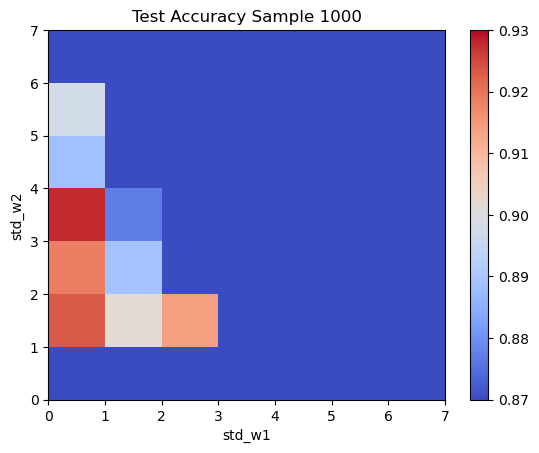

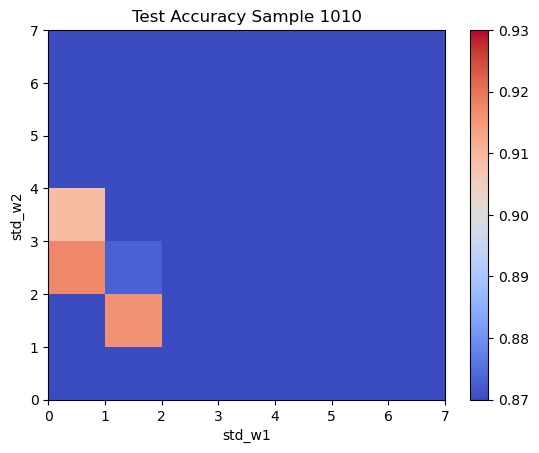

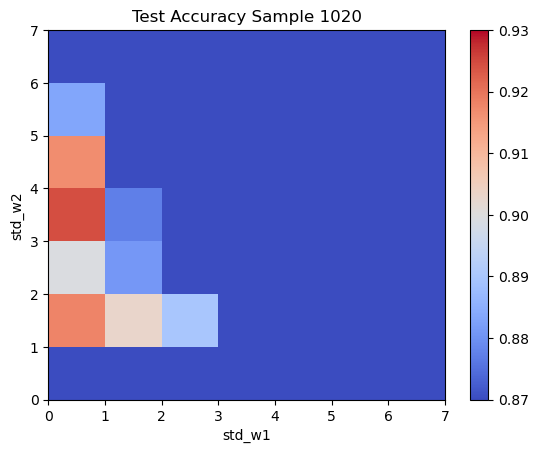

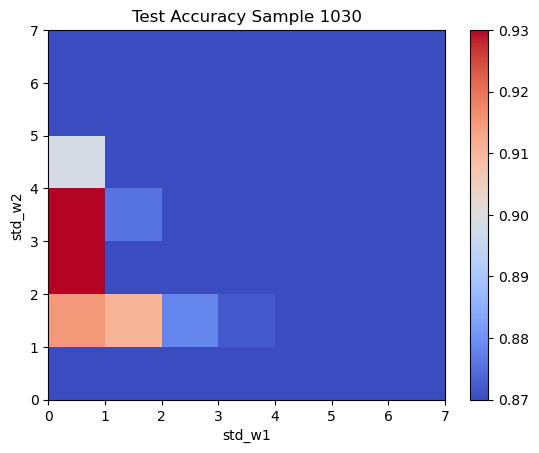

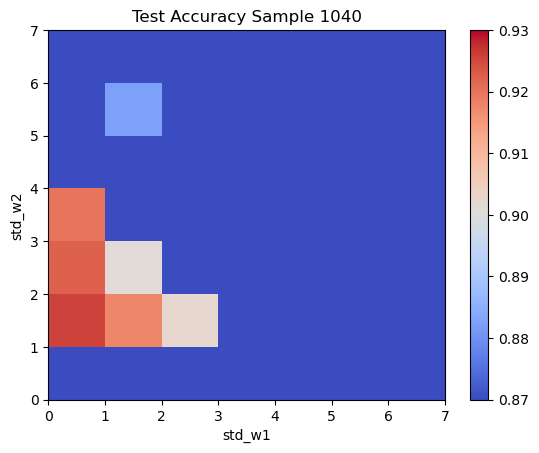

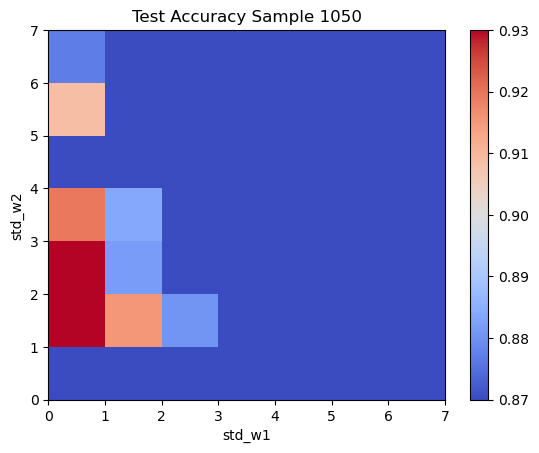

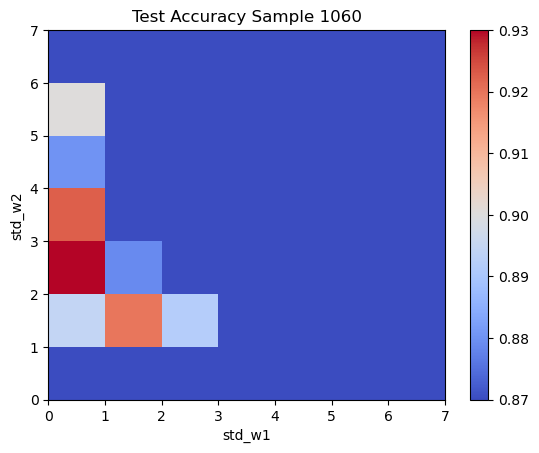

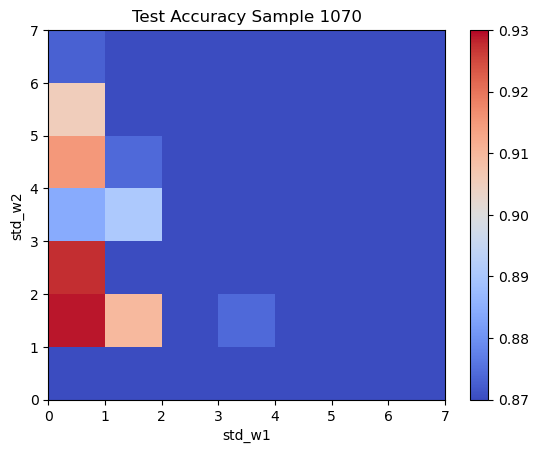

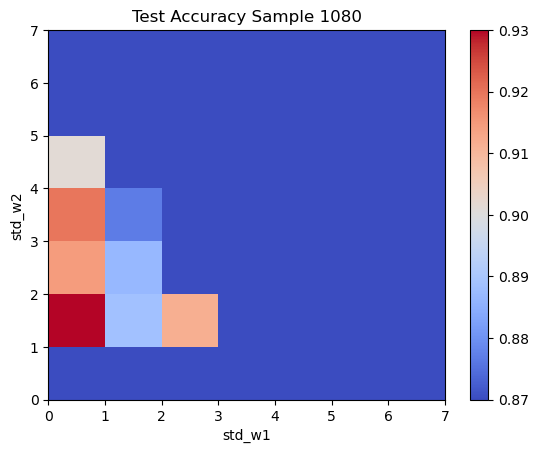

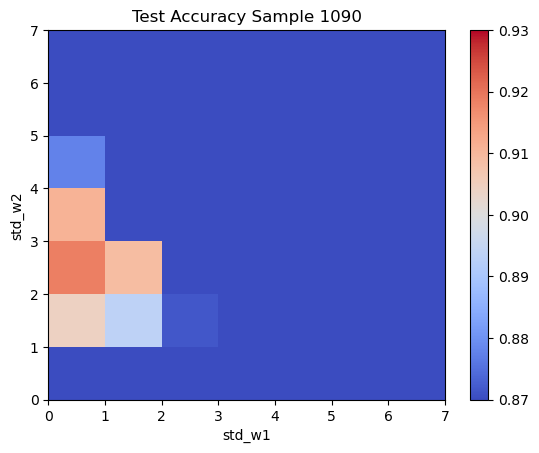

In [3]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'], cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(test_accuracy_10_samples[i])
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [4]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [5]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [6]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.07421875, 0.07421875, 0.07421875, 0.07421875, 0.07421875,
        0.07421875, 0.07421875],
       [0.9106871 , 0.90754207, 0.88712941, 0.85230369, 0.82671274,
        0.80506811, 0.79449119],
       [0.92411859, 0.88345353, 0.83120994, 0.78245192, 0.75377604,
        0.7435597 , 0.73830128],
       [0.9169972 , 0.86883013, 0.80394631, 0.76078726, 0.73121995,
        0.7088742 , 0.69244792],
       [0.86897035, 0.85584936, 0.78324319, 0.75072115, 0.68551683,
        0.65291466, 0.61104768],
       [0.85601963, 0.84941907, 0.77678285, 0.69551282, 0.66813902,
        0.59614383, 0.53933293],
       [0.75217348, 0.84722556, 0.75112179, 0.70357572, 0.60198317,
        0.55282452, 0.49163662]])

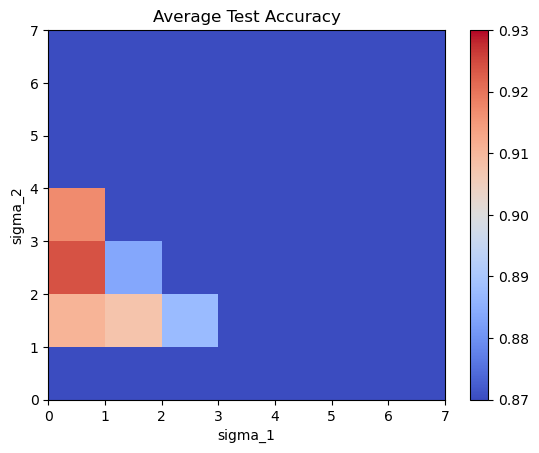

In [7]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_400_0.1.png".format(sample))

In [8]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [ True,  True,  True, False, False, False, False],
       [ True,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [9]:
test1 = average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_test_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_test_accuracy_grid_10_by_10_10_samples>0.87005209)

print(test2)


[0.88345353 0.88712941 0.90754207 0.9106871  0.9169972  0.92411859]


In [10]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.015+0.005
    array.append(tbw1_w2)

In [11]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 400
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_400_seed_{}.npz".format(i),**data)
    i+=1

In [12]:
data = {}
data['frequency'] = 65
data['N'] = 400
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_400",**data)